In [1]:
import pandas as pd
import cProfile

# Transantiago's travels public submit
url = 'https://github.com/diegocaro/tallerds/raw/master/notebooks/origen_destino_stgo_2012/EOD_STGO/viajes.csv'
viajes = pd.read_csv(url, sep=';', decimal=',', index_col=['Viaje'])

In [2]:
# Let's work with a sample to save computing time
data_cols = ['OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY']
drop_cols = [x for x in list(viajes.columns) if x not in data_cols]
viajes_sample = viajes.drop(columns=drop_cols).replace(0, None).dropna().drop_duplicates().sample(n=8000)

# Check size
viajes_sample.shape

(8000, 4)

In [3]:
# Remove travels from/to outside the city, so the plot don't have to scale way outside the city

limit_n = 6316000
limit_s = 6278000
limit_w =  332000
limit_e =  368000

query = '@limit_s < OrigenCoordY < @limit_n'
query += ' and @limit_s < DestinoCoordY < @limit_n'
query += ' and @limit_w < OrigenCoordX < @limit_e'
query += ' and @limit_w < DestinoCoordX < @limit_e'

viajes_city = viajes_sample.query(query)

# Check size
viajes_city.shape

(7101, 4)

In [7]:
viajes_city

OrigenCoordX  OrigenCoordY  DestinoCoordX  DestinoCoordY
Viaje                                                               
1550410202   351488.8125     6304144.5    351872.8125      6304064.0
2471610302   346374.4375     6300182.5    346502.5625      6300212.5
3245210102   348268.8750     6305872.0    348561.2500      6305728.5
1484900201   346533.2813     6285320.5    345125.0938      6286997.5
1440200302   348860.7188     6282596.5    348238.9375      6287380.5
...                  ...           ...            ...            ...
1507810202   353527.4375     6297256.0    357070.5625      6296931.0
1540520102   351097.2500     6301199.0    351225.0625      6301656.5
2516100401   344638.3125     6287416.0    345439.7188      6286493.0
1983000112   346062.1563     6298434.0    343017.6875      6292324.5
1589310602   353388.1563     6305631.0    360344.0000      6304627.5

[7101 rows x 4 columns]

In [4]:
import ForcedirectedEdgeBundling as feb

edges = feb.array2edges(viajes_city.values)
# Check size (small edges are removed)
len(edges)

/mnt/c/Users/Tabita/Documents/practica3/python.ForceBundle/ForcedirectedEdgeBundling.py:153: NumbaTypeSafetyWarning: unsafe cast from int64 to int16. Precision may be lost.
  compatibility_list[e_idx].append(oe_idx)


6949

In [5]:
edges[1].source

In [8]:
# Overwrite default hyper-parameters:
#
# higher initial distance to move points
feb.S_initial = 50
# lowe compatibility threshold
feb.compatibility_threshold = 0.5

%time output_lines = feb.forcebundle(edges)

NameError: name '_pesos' is not defined

C:\Users\Tabita\anaconda3\envs\force_bundle\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Tabita\Documents\Práctica 3\python.ForceBundle\usageHelper.py:49: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
C:\Users\Tabita\anaconda3\envs\force_bundle\lib\site-packages\contextily\tile.py:265: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  warnings.warn(


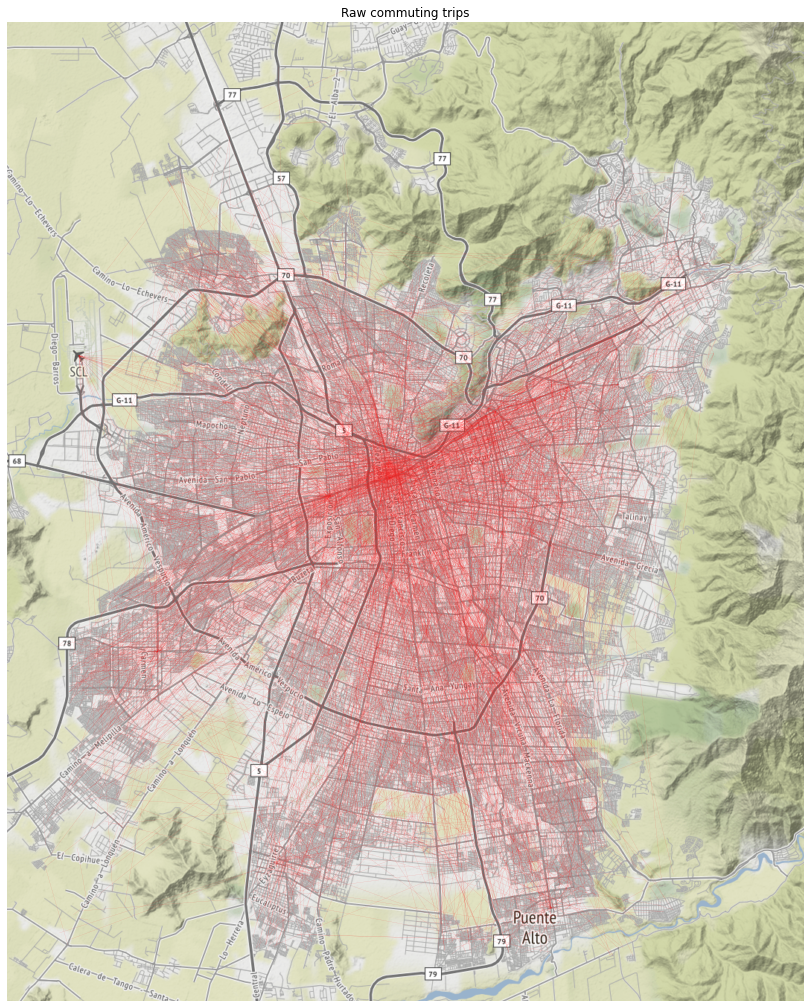

C:\Users\Tabita\anaconda3\envs\force_bundle\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Tabita\Documents\Práctica 3\python.ForceBundle\usageHelper.py:49: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
C:\Users\Tabita\anaconda3\envs\force_bundle\lib\site-packages\contextily\tile.py:265: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  warnings.warn(


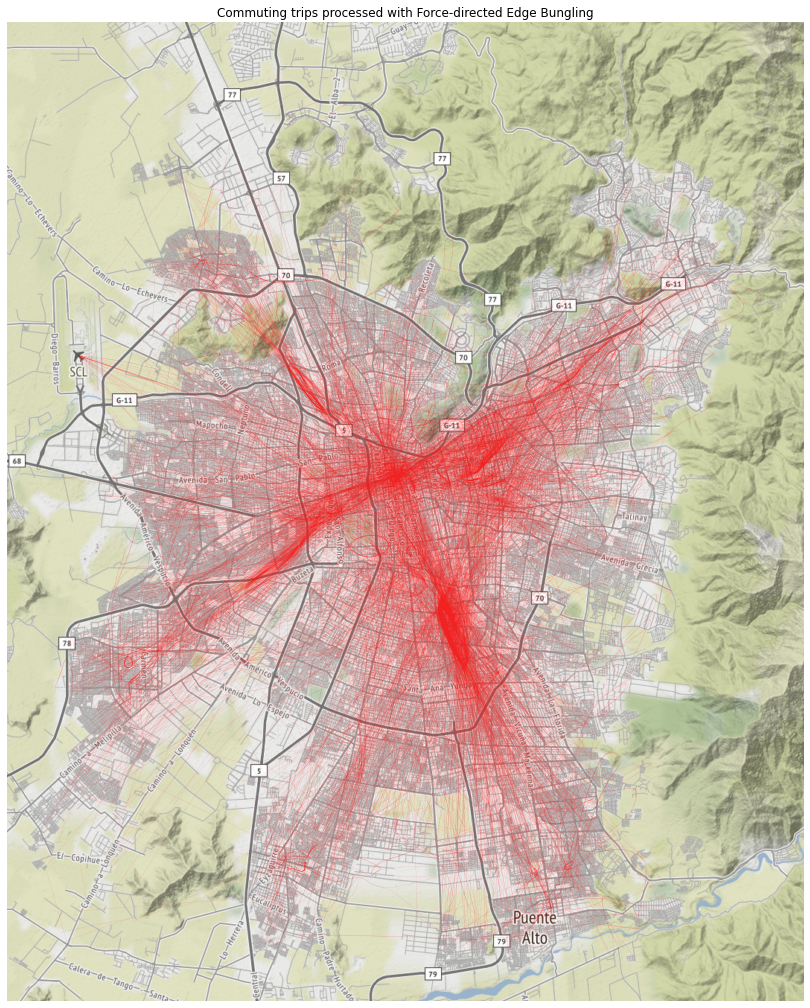

In [9]:
import usageHelper
%matplotlib inline

# Plot raw for comparison
input_lines = feb.edges2lines(edges)
usageHelper.plot_lines_on_map(input_lines, footer='Raw commuting trips')

# Plot trips after Force-directed Edge Bungling
usageHelper.plot_lines_on_map(output_lines, footer='Commuting trips processed with Force-directed Edge Bungling')